# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

### Calculating the Joint Probability

#### The Dot Product

In [5]:
# how dot product is calculate
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [6]:
a.dot(b) #1*0 + 2*5 + 3*4

22

In [7]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('shape of c is', c.shape)
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [8]:
print(a.dot(c)) #[1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1]
print('shape of the dot product is', a.dot(c).shape)

[21  9]
shape of the dot product is (2,)


In [9]:
# Dimensions
X_test.shape

(1724, 2500)

In [10]:
prob_token_spam.shape

(2500,)

In [11]:
print('shape of the dot product is ', X_test.dot(prob_token_spam).shape)

shape of the dot product is  (1724,)


### Set the Prior
$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$
$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [12]:
PROB_SPAM = 0.3116

In [13]:
np.log(prob_token_spam) # transforming the probabilities of each spam words into log

array([ -4.70510889,  -5.32152228,  -4.98519763, ...,  -9.06126015,
        -9.89416927, -10.81046   ])

### Joint probability in log format

Joint Probability:
The probability of this message " I am a message " to be a spam is,
$ P(Spam \, | \, I) \times P(Spam \, | \, am) \times P(Spam \, | \, a) \times P(Spam \, | \, message)$

In [14]:
# probability if email is spam
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [15]:
joint_log_spam[:5]

array([  3.21926579,  13.35310029,  19.22329985, -16.59574721,
        27.98072153])

In [16]:
# probabilit if email is nonspam
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [17]:
joint_log_ham[:5]

array([-11.05412802, -36.85845149, -38.27162954,  -2.71255363,
       -60.20277184])

## Making Predictions
### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>**OR**</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [18]:
prediction = joint_log_spam > joint_log_ham

In [19]:
prediction[-5:]*1 # our prediction

array([0, 0, 0, 0, 0])

In [20]:
y_test[-5:] # the real value(perfectly matches!)

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$
removing denominator

In [21]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

## Accuracy
$$ \frac { \text { No. of correct predictions } } { \text { No. of total predictions } } $$

In [22]:
correct_docs = (y_test == prediction).sum() # 1 if True
print('Docs classified correctly', correct_docs)
numdocs_wrong = len(X_test) - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1672
Docs classified incorrectly 52


In [23]:
# Accuracy
correct_docs/len(X_test) # 97%

0.9698375870069605

In [24]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 3.02%
Accuracy of the model is 96.98%


## Visualising the Results


In [25]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000) # creating a line(decision boundary)

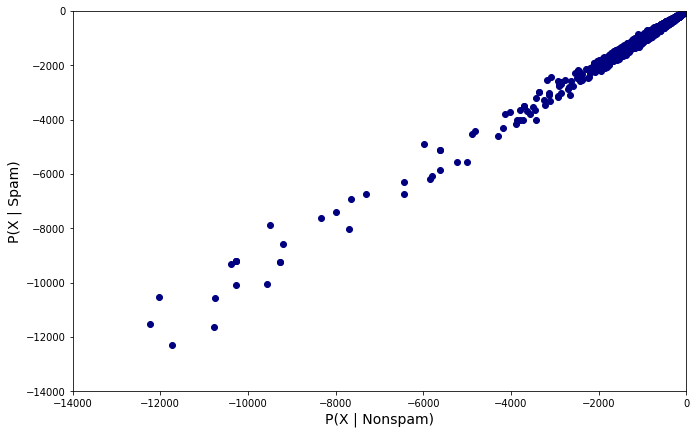

In [26]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1]) # zooming
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

### The Decision Boundary
One side of the boundary will be classified as spam and other side is nonspam

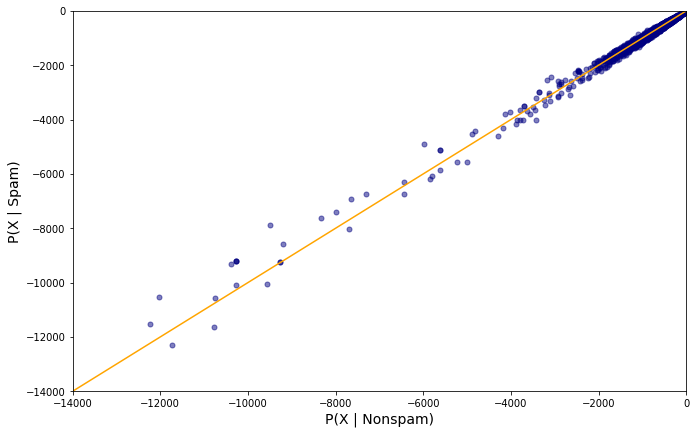

In [27]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

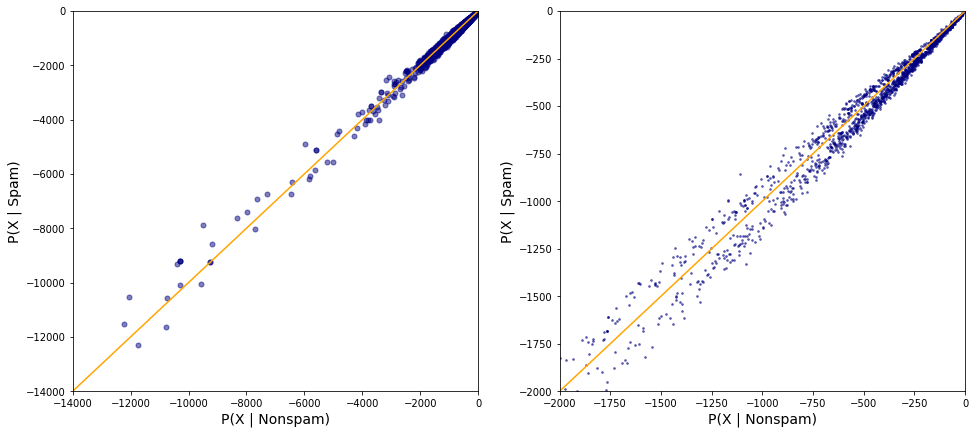

In [28]:
# using to plots(real and zoomed) and modify to tackle overplotting
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [29]:
# using seaborn

In [30]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


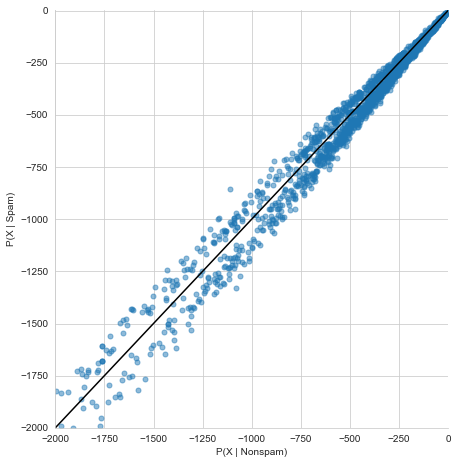

In [31]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


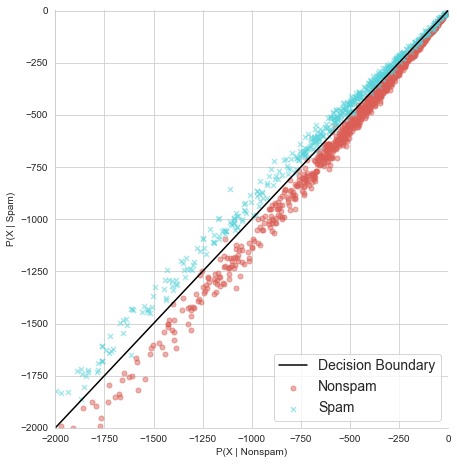

In [32]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls') # hue to give different colors
                                                            # markers (x & o) on each side dots, palette for color

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14) # create legends

plt.show()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


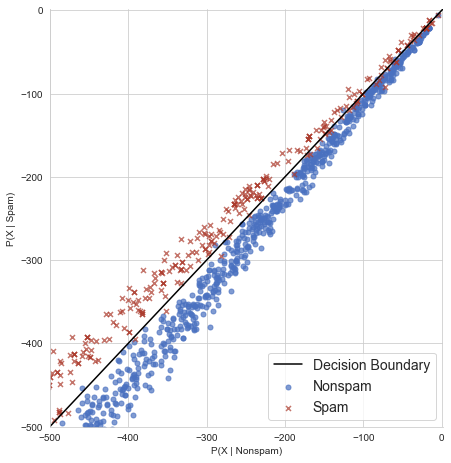

In [33]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

### False Positives and False Negatives
Spam emails that are classified as nonspam(False negative), and nonspam email that are classified as spam(False positive)

In [34]:
np.unique(prediction, return_counts=True) # we predicted spam 559 times

(array([False,  True]), array([1165,  559], dtype=int64))

In [35]:
true_pos = (y_test == 1) & (prediction == 1) # True positive

In [36]:
true_pos.sum() # we predicted true positive 548 times( 559 - 548 tiemes we were wrong or False positive)

548

In [37]:
false_pos = (y_test == 0) & (prediction == 1) # False positive
false_pos.sum()

11

In [38]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

41

### Recall Score

In [44]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum()) # problem if all emails are classified as spam(True)
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 93.04%


### Precision Score

In [45]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum()) # problem if all emails are classified as nonspam(True)
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.98


### F-Score or F1 Score

In [46]:
# f score takes both precision and recall score into account, the higher the score the better
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.95
